## Практическая работа

В этой практической работе четыре обязательные задачи.

*Обязательные задачи* нужно сделать для того, чтобы проверить, что вы действительно усвоили материал модуля. Сдайте их на проверку.

Удачи!

Цели практической работы: 


1.   Потренироваться в обучении моделей деревьев решений.
2.   Потренироваться в обучении моделей случайного леса. 
3.   Научиться оценивать качество моделей с помошью Accuracy и confusion matrix.
4.   Научиться увеличивать качество моделей с помощью тюнинга параметров.




Что оценивается:

*   Все пункты и критерия приёмки задания выполнены.
*   Удаление колонок по результатам feature_importance и определения типов производится с помощью кода, а не перечислением их вручную.




## Обязательные задачи

### Описание датасета:
- `id`: идентификатор записи;
- `is_manufacturer_name`: признак производителя автомобиля;

- `region_*`: регион;
- `x0_*`: тип топлива;
- `manufacturer_*`: производитель;
- `short_model_*`: сокращённая модель автомобиля;
- `title_status_*`: статус;
- `transmission_*`: коробка передач;
- `state_*`: штат;
- `age_category_*`: возрастная категория автомобиля;

- `std_scaled_odometer`: количество пройденных миль (после стандартизации);
- `year_std`: год выпуска (после стандартизации);
- `lat_std`: широта (после стандартизации);
- `long_std`: долгота (после стандартизации);
- `odometer/price_std`: отношение стоимости к пробегу автомобиля (после стандартизации);
- `desc_len_std`: количество символов в тексте объявления о продаже (после стандартизации);
- `model_in_desc_std`: количество наименований модели автомобиля в тексте объявления о продаже (после стандартизации);
- `model_len_std`: длина наименования автомобиля (после стандартизации);
- `model_word_count_std`: количество слов в наименовании автомобиля (после стандартизации);
- `month_std`: номер месяца размещения объявления о продаже автомобиля (после стандартизации);
- `dayofweek_std`: день недели размещения объявления о продаже автомобиля (после стандартизации);
- `diff_years_std`: количество лет между годом производства автомобиля и годом размещения объявления о продаже автомобиля (после стандартизации);

- `price`: стоимость;
- `price_category`: категория цены.

0. *Подготовка базовой модели*

Обучите простую модель классификации с помощью DecisionTreeClassifier на данных из датасета vehicles_dataset_prepared.csv. Для этого сделайте следующие шаги:

1. Обучите модель дерева решений с зафиксированным random_state на тренировочной выборке.
2. Сделайте предикт на тестовой выборке.
3. Замерьте точность на тестовой выборке и выведите матрицу ошибок. 
4. Удалите фичи с нулевыми весами по feature_importance из тренировочной и тестовой выборок.
5. Заново обучите модель и измерьте качество.

In [1]:
%%time
from turtle import color
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix 

Wall time: 372 ms


In [2]:
%%time
df = pd.read_csv('data/vehicles_dataset_prepared.csv')

df_prepared = df.copy()
df_prepared = df_prepared.drop(['price', 'odometer/price_std'], axis=1)

x = df_prepared.drop(['price_category'], axis=1)
y = df_prepared['price_category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Wall time: 2.24 s


In [3]:
%%time
# Создаем экземпляр класса модели DecisionTreeClassifier
clf = DecisionTreeClassifier()
# Обучим модель с параметрами по умолчанию
clf.fit(x_train, y_train)
# запишем в переменную clf_predict результат работы модели на тестовых данных и данных на которых модель обучалась
clf_predict_tr = clf.predict(x_train)
clf_predict_ts = clf.predict(x_test)
# Посмотрим качество модели по метрике accuracy_score
print(accuracy_score(y_train, clf_predict_tr))
print(accuracy_score(y_test, clf_predict_ts))

1.0
0.6704781704781705
Wall time: 729 ms


In [4]:
%%time
# Удалиv фичи с нулевыми весами по feature_importance из тренировочной и тестовой выборок.
# Определим веса
f_imp_list = list(zip(x_train.columns, clf.feature_importances_))
# Создадим список фич с нулевыми весами, для удаления из набора данных
drop_column = [x[0] for x in f_imp_list if(x[1]== .0)]
# Удалим столбцы dataFrame c нулевыми весами из обучающей и тестовой выборок
x_train_clean = x_train.drop(drop_column, axis=1)
x_test_clean = x_test.drop(drop_column, axis=1)

Wall time: 10 ms


In [5]:
%%time
# Создаем новый экземпляр класса модели DecisionTreeClassifier
clf2 = DecisionTreeClassifier()
# Обучим новую модель с параметрами по умолчанию на очищенных данных
clf2.fit(x_train_clean, y_train)
# запишем в переменную clf_predict результат работы модели на тестовых данных и данных на которых модель обучалась
clf_predict_tr2 = clf2.predict(x_train_clean)
clf_predict_ts2 = clf2.predict(x_test_clean)
# Посмотрим качество модели по метрике accuracy_score
print(accuracy_score(y_train, clf_predict_tr2))
print(accuracy_score(y_test, clf_predict_ts2))

1.0
0.6715176715176715
Wall time: 310 ms


После очистки данных от фичей с нулевыми весами, *accuracy_score* не значительно снизился, но выросла скорость работы модели

1. *Подготовка модели случайного леса*

Обучите простую модель классификации с помощью RandomForestClassifier. Для этого сделайте следующие шаги:
1. На новых урезанных семплах тренировочной и тестовой выборок обучите модель случайного леса с зафиксированным random_state=50. 

2. Сделайте предикт и посчитайте точность модели и матрицу ошибок. Сравните с предыдущей моделью дерева решений. Есть ли случаи, когда модель из пункта 1 отрабатывает лучше, чем модель случайного леса?

In [6]:
%%time
# Импортируем модуль
from sklearn.ensemble import RandomForestClassifier

Wall time: 30 ms


In [7]:
%%time
# ОБУЧИМ БАЗОВУЮ МОДЕЛЬ
# Создаем экземпляр класса модели RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
# Обучим модель с параметрами по умолчанию
rfc.fit(x_train_clean, y_train)
# запишем в переменную clf_predict результат работы модели на тестовых данных и данных на которых модель обучалась
rfc_predict_tr = rfc.predict(x_train_clean)
rfc_predict_ts = rfc.predict(x_test_clean)
# Посмотрим качество модели по метрике accuracy_score
print(accuracy_score(y_train, rfc_predict_tr))
print(accuracy_score(y_test, rfc_predict_ts))

1.0
0.7435897435897436
Wall time: 2.23 s


2. *Тюнинг модели случайного леса*

Увеличьте точность модели на тестовом датасете RandomForestClassifier c помощью тюнинга параметров.

Параметры, которые можно настраивать для увеличения точности:

```
    `bootstrap'
    'max_depth'
    'max_features'
    'min_samples_leaf'
    'min_samples_split'
    'random_state'
    'n_estimators'

```



С описанием каждого из параметров можно ознакомиться в документации:


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Задание засчитывается, если значение метрики строго выше 0,76 на тестовом датасете.

n_estimators — число «деревьев» в «случайном лесу».
max_features — число признаков для выбора расщепления.
max_depth — максимальная глубина деревьев.
min_samples_split — минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться.
min_samples_leaf — минимальное число объектов в листьях.
bootstrap — использование для построения деревьев подвыборки с возвращением.

In [8]:
# Посмотрим на параметры модели и соxраним в переменную
rfc_param = rfc.get_params()
rfc_param

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [9]:
%%time
# Создаем экземпляр класса модели RandomForestClassifier
rfc2 = RandomForestClassifier()
# Оптимизация гиперпараметров методом перебора по сетке. Используем RandomizedSearchCV, который позволяет довольно грубо исследовать широкие диапазоны значений.
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 100, num = 60)]
#min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
#min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              #'min_samples_split': min_samples_split,
              #'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc2,
                        param_dist,
                        n_iter = 100,
                        cv = 3,
                        verbose = 1,
                        n_jobs=-1,
                        random_state=42)
rs.fit(x_train_clean, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Wall time: 6min 42s


{'n_estimators': 900,
 'max_features': 'log2',
 'max_depth': 63,
 'bootstrap': False}

In [10]:
%%time
#Посмотрим на параметры и результаты работы алгоритма RandomizedSearchCV. Для этого преобразуем в DataFrame для удобства
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
    'mean_fit_time',
    'std_fit_time',
    'mean_score_time',
    'std_score_time',
    'params',
    'split0_test_score',
    'split1_test_score',
    'split2_test_score',
    'std_test_score'],
    axis=1)
rs_df.head(10)

Wall time: 3 ms


,param_n_estimators,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,900,log2,63,False,0.761772,1
1,800,log2,59,False,0.760732,2
2,900,log2,86,False,0.759693,3
3,500,log2,69,False,0.759099,4
4,1000,log2,49,False,0.758801,5
5,600,log2,53,False,0.758653,6
6,1000,log2,42,False,0.758356,7
7,300,log2,53,False,0.758059,8
8,300,log2,63,False,0.757613,9
9,200,log2,94,False,0.756128,10


In [11]:
%%time
#оценить созданные модели на проверочных данных
y_pred_baseline = rfc.predict(x_test_clean)
y_pred_rs = rs.best_estimator_.predict(x_test_clean)

Wall time: 1.23 s


In [12]:
%%time
#Создадим матрицы ошибок для моделей и узнаем о том, как хорошо каждая из них способна предсказывать
conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred_baseline), index = ['high', 'medium', 'low'], columns = ['predicted 0', 'predicted 1', 'predicted 2'])
conf_matrix_rs = pd.DataFrame(confusion_matrix(y_test, y_pred_rs), index = ['high', 'medium', 'low'], columns = ['predicted 0', 'predicted 1', 'predicted 2'])
display(conf_matrix_baseline)
display('Baseline DecisionTreeClassifier accuracy_score', accuracy_score(y_test, y_pred_baseline))
display(conf_matrix_rs)
display('Random Forest RandomizedSearchCV accuracy_score', accuracy_score(y_test, y_pred_rs))

,predicted 0,predicted 1,predicted 2
high,803,34,160
medium,14,784,155
low,173,204,559


'Baseline DecisionTreeClassifier accuracy_score'

0.7435897435897436

,predicted 0,predicted 1,predicted 2
high,809,33,155
medium,12,800,141
low,140,200,596


'Random Forest RandomizedSearchCV accuracy_score'

0.764033264033264

Wall time: 40 ms


3. *Анализ влияния фичей на модель*

Во всех задачах до вы работали над подготовленным датасетом, где фичи были заранее извлечены из текстовых переменных, отскейлены и пропущены через One Hot Encoder. Сравним, какой была бы предсказательная способность модели, если бы мы использовали только сырые данные из исходного датасета. Для этого проделайте следующие шаги:

1. Загрузите датасет `vehicles_dataset_old.csv`.
2. Удалите из него переменную `price` и все строковые колонки. Дерево решений и случайный лес не умеют самостоятельно работать со строковыми значениями.
3. Сформируйте x_train и x_test так же, как они были сформированы в предыдущих заданиях.
4. Обучите свою лучшую модель случайного леса на новых данных и замерьте качество. Убедитесь, что оно ухудшилось.
5. Найдите три фичи, которые лучшим образом повлияли на предсказательную способность модели.

In [13]:
%%time
#Загрузим сырые данне
df_old = pd.read_csv('data/vehicles_dataset_old.csv')
df_old.head()

Wall time: 511 ms


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,clean,other,https://images.craigslist.org/00F0F_5UAXmOzC18...,Carvana is the safer way to buy a car During t...,tn,35.970000,-83.940000,2021-04-08T15:10:56-0400,medium,2021-04-08 19:10:56+00:00


In [14]:
%%time
#Посмотрим на типы переменных с помощью метода info
df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9619 entries, 0 to 9618
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9619 non-null   int64  
 1   url             9619 non-null   object 
 2   region          9619 non-null   object 
 3   region_url      9619 non-null   object 
 4   price           9619 non-null   int64  
 5   year            9619 non-null   int64  
 6   manufacturer    9619 non-null   object 
 7   model           9619 non-null   object 
 8   fuel            9619 non-null   object 
 9   odometer        9619 non-null   int64  
 10  title_status    9619 non-null   object 
 11  transmission    9619 non-null   object 
 12  image_url       9619 non-null   object 
 13  description     9619 non-null   object 
 14  state           9619 non-null   object 
 15  lat             9619 non-null   float64
 16  long            9619 non-null   float64
 17  posting_date    9619 non-null   o

In [15]:
%%time
#Удалим лишние переменные из нашего набора данных
#Посмотрим размерность DataFrame
display(df_old.shape)
#Удалим переменную price
df_old_edit = df_old.drop(['price'], axis=1)
#Посмотрим размерность DataFram-а
display(df_old_edit.shape)

(9619, 20)

(9619, 19)

Wall time: 6 ms


In [16]:
df_old_edit.columns

Index(['id', 'url', 'region', 'region_url', 'year', 'manufacturer', 'model',
       'fuel', 'odometer', 'title_status', 'transmission', 'image_url',
       'description', 'state', 'lat', 'long', 'posting_date', 'price_category',
       'date'],
      dtype='object')

In [17]:
#Отделим целевую переменную
y = df_old_edit['price_category']
X = df_old_edit.drop(['price_category'], axis=1)
X.shape, y.shape

((9619, 18), (9619,))

In [18]:
%%time
#Получим список не числовых переменных
object_columns = X.select_dtypes(['object']).columns
display(object_columns)

Index(['url', 'region', 'region_url', 'manufacturer', 'model', 'fuel',
       'title_status', 'transmission', 'image_url', 'description', 'state',
       'posting_date', 'date'],
      dtype='object')

Wall time: 5 ms


In [19]:
%%time
#Удалим все не числовые переменные
X = X.drop(object_columns, axis=1)
#Посмотрим размерность DataFram-а
display(X.shape)

(9619, 5)

Wall time: 3 ms


In [20]:
%%time
X.head()

Wall time: 0 ns


,id,year,odometer,lat,long
0,7308295377,2020,27442,35.060000,-85.250000
1,7316380095,2016,60023,40.821805,-74.061962
2,7313733749,2017,14048,33.779214,-84.411811
3,7308210929,2013,117291,35.715954,-78.655304
4,7303797340,2012,80465,35.970000,-83.940000


In [21]:
%%time
#Разделим на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Wall time: 8 ms


In [22]:
rs_2 = rs.best_estimator_
rs_2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=63, max_features='log2',
                       n_estimators=900)

In [23]:
%%time
#оценить созданные модели на проверочных данных
y_pred_rs_2 = rs_2.predict(x_test)

Wall time: 652 ms


In [24]:
%%time
#Создадим матрицы ошибок для моделей и узнаем о том, как хорошо каждая из них способна предсказывать
conf_matrix_rs = pd.DataFrame(confusion_matrix(y_test, y_pred_rs), index = ['high', 'medium', 'low'], columns = ['predicted 0', 'predicted 1', 'predicted 2'])
conf_matrix_rs_2 = pd.DataFrame(confusion_matrix(y_test, y_pred_rs_2), index = ['high', 'medium', 'low'], columns = ['predicted 0', 'predicted 1', 'predicted 2'])
display(conf_matrix_rs)
display('Random Forest RandomizedSearchCV accuracy_score', accuracy_score(y_test, y_pred_rs))
display(conf_matrix_rs_2)
display('Random Forest RandomizedSearchCV No Scaler data accuracy_score', accuracy_score(y_test, y_pred_rs_2))

,predicted 0,predicted 1,predicted 2
high,809,33,155
medium,12,800,141
low,140,200,596


'Random Forest RandomizedSearchCV accuracy_score'

0.764033264033264

,predicted 0,predicted 1,predicted 2
high,690,76,231
medium,48,698,207
low,272,234,430


'Random Forest RandomizedSearchCV No Scaler data accuracy_score'

0.6299376299376299

Wall time: 35 ms


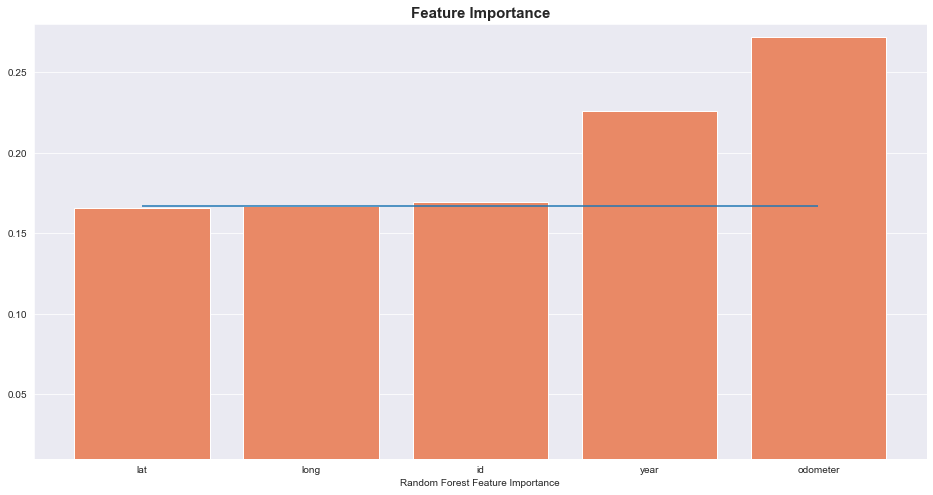

In [53]:
fig, axs = plt.subplots()
fig.set_size_inches(16,8)

sorted_idx = rs_2.feature_importances_.argsort()
sns.barplot(x=X.columns[sorted_idx], y=rs_2.feature_importances_[sorted_idx], color='coral')
axs.set_ylim([.01,.28])
axs.set_title(label = 'Feature Importance', size=15, weight='bold')
axs.hlines(.167, 0,4)
plt.xlabel("Random Forest Feature Importance")
plt.show()

#### Три фичи, которые лучшим образом повлияли на предсказательную способность модели: odometer, year и id